# Classifying high dimensionality remote sensing images

## Intro to hyperspectral remote sensing
Insert graphic of cube, explanative text

In [1]:
from arcgis.gis import GIS
from arcgis import raster

In [2]:
# gis = GIS("https://dev0001902.esri.com/portal","admin", verify_cert=False)
gis = GIS("https://pythonapi.playground.esri.com/portal","atma.mani")
# gis = GIS("https://python.playground.esri.com/portal","arcgis_python","amazing_arcgis_123")

Enter password: ········


In [3]:
# aviris_item = gis.content.get('596098ec0e834e7d9f8e81e14de14ef2')
aviris_item = gis.content.search('AVIRIS', item_type='Imagery Layer')[0]
aviris_item

<Item title:"omaha_aviris" type:Imagery Layer owner:atma.mani>

In [4]:
map1 = gis.map('Omaha, NE')
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [5]:
map1.add_layer(aviris_item)

## Draw using false color composite

### Get AVIRIS band wavelengths

In [4]:
aviris_layer = aviris_item.layers[0]
aviris_bands = aviris_layer.key_properties()['BandProperties']
len(aviris_bands)

224

In [5]:
aviris_bands[0]['wavelength']

'365.9298'

In [6]:
aviris_bands[-1]['wavelength']

'2497.036'

In [7]:
aviris_layer = aviris_item.layers[0]
aviris_fcc = raster.stretch(raster = raster.extract_band(aviris_layer, band_wavelengths=[831, 665.0994, 560]),
                            stretch_type='histogram')

In [11]:
map1.remove_layers()
map1.add_layer(aviris_fcc)

## Get spectral signature from the remotely sensed image

No handles with labels found to put in legend.


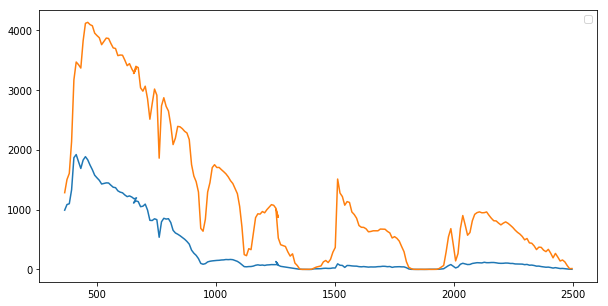

In [76]:
map2 = gis.map('Greenwood, NE', zoomlevel=13)
map2

In [77]:
map2.add_layer(aviris_fcc)

##### drawing logic

In [38]:
from bokeh.models import Range1d
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
output_notebook()

import matplotlib.pyplot as plt
%matplotlib inline

Loading BokehJS ...

In [11]:
symbol_list = [{"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueA.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueB.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueC.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueD.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueE.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueF.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueG.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueH.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueI.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueJ.png","contentType":"image/png","width":14,"height":22},
              {"angle":0,"xoffset":0,"yoffset":8.15625,"type":"esriPMS","url":"http://static.arcgis.com/images/Symbols/AtoZ/blueK.png","contentType":"image/png","width":14,"height":22}]
legend_list = ['A','B','C','D','E','F','G','H','I','J']
bokeh_colors=['blue','blueviolet','brown',
              'burlywood','cadetblue','chartreuse',
              'chocolate','coral','cornflowerblue',
             'cyan','darkblue']
x_axis = [float(s['wavelength']) for s in aviris_bands]

### plot logic

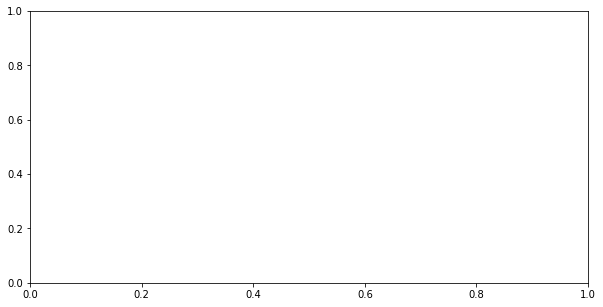

In [78]:
i = 0
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

In [83]:
def plot_reflectance_curves(map_handle, clicked_point):
    global i, p
#     print(i)

    # Get cell value from imagery layer
    image_data = aviris_layer.get_samples(clicked_point)
    radiance_values = image_data[0]['values']

    # choose symbol
    map_handle.draw(clicked_point, symbol = symbol_list[i])
    
    # bokeh plot
#     p.line(x_axis, radiance_values, legend=legend_list[i], line_color=bokeh_colors[i], line_width=2)
    # matplotlib plot
    if i>0:
        clear_output()
    axes.plot(x_axis, radiance_values)
    axes.legend(loc=0)
    display(fig)
    i = i+1
    
map2.on_click(plot_reflectance_curves)

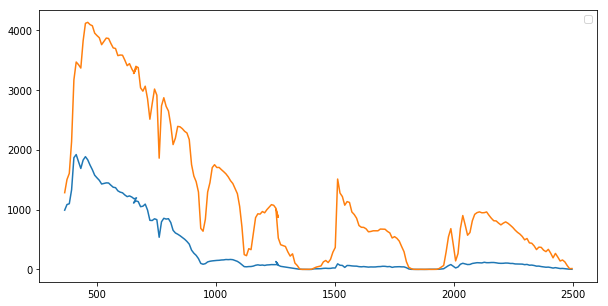

In [84]:
display(fig)

In [61]:
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

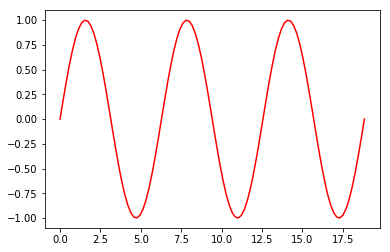

In [62]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
line1, = ax.plot(x, y, 'r-')

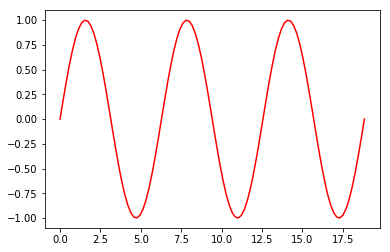

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
    fig.canvas.flush_events()

In [56]:
fig2.clear()

In [57]:
display(fig2)

<Figure size 432x288 with 0 Axes>

In [ ]:
ax.clear